In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

<function matplotlib.pyplot.show(close=None, block=None)>

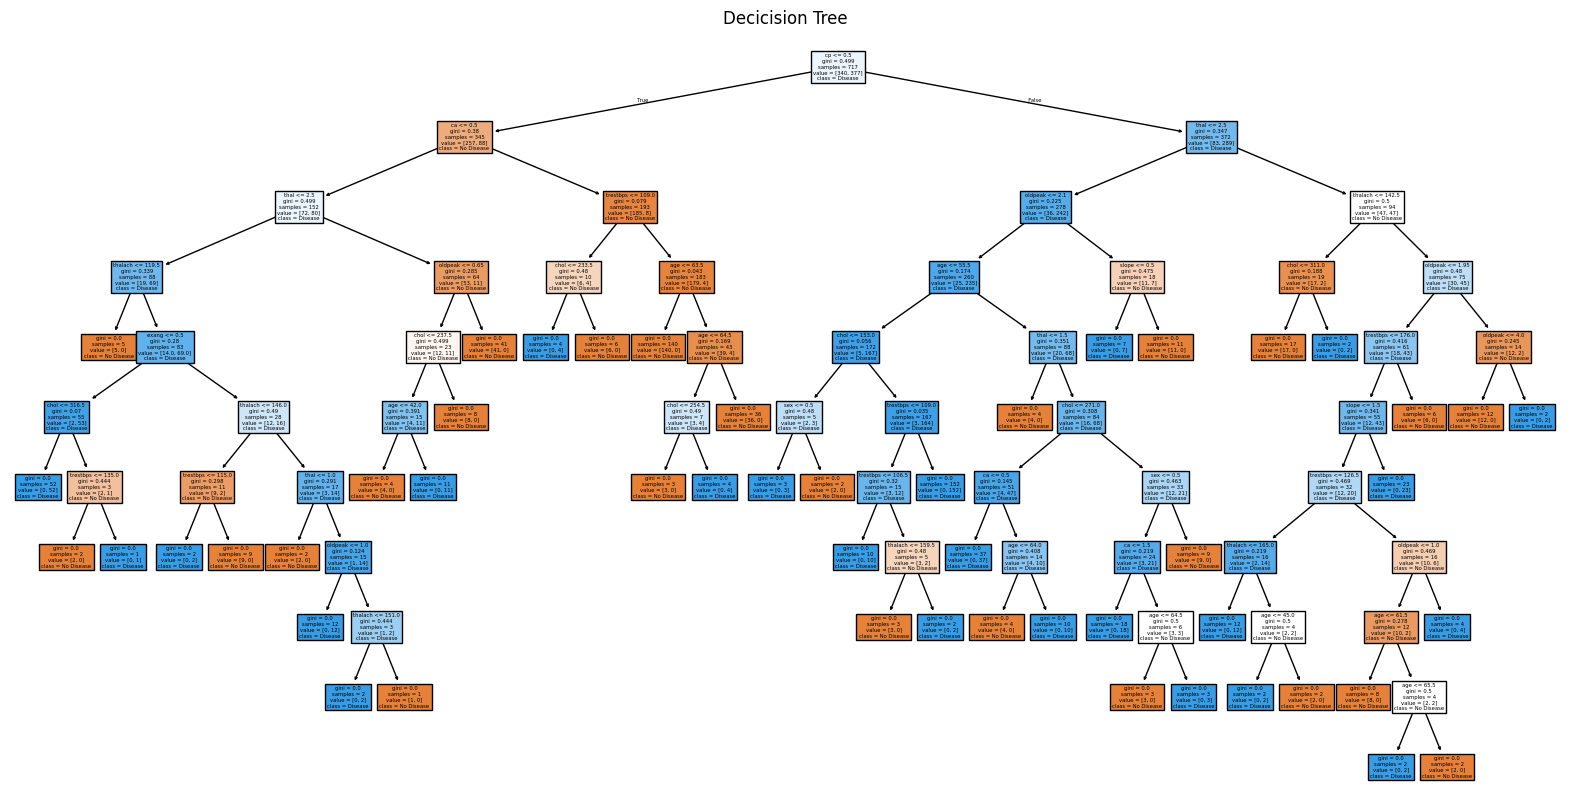

In [2]:
# 1.) Train a Decision Tree Classifier and visualize the tree.

df=pd.read_csv('/content/heart.csv')

x=df.drop('target',axis=1)
y=df['target']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

model=DecisionTreeClassifier(random_state=42)
model.fit(x_train,y_train)

plt.figure(figsize=(20,10))
plot_tree(model, feature_names=x.columns, class_names=['No Disease','Disease'], filled=True)
plt.title('Decicision Tree')
plt.show

In [3]:
# 2.) Analyze overfitting and control tree depth.

train_acc_full=accuracy_score(y_train,model.predict(x_train))
test_acc_full=accuracy_score(y_test,model.predict(x_test))

print('Unpruned Tree')
print(f'Train Accuracy : {train_acc_full}')
print(f'Test Accuracy : {test_acc_full}')

model_pruned=DecisionTreeClassifier(max_depth=3,random_state=42)
model_pruned.fit(x_train,y_train)

train_acc_pruned=accuracy_score(y_train,model_pruned.predict(x_train))
test_acc_pruned=accuracy_score(y_test,model_pruned.predict(x_test))

print('Pruned Tree')
print(f'Train Accuracy : {train_acc_pruned}')
print(f'Test Accuracy : {test_acc_pruned}')

Unpruned Tree
Train Accuracy : 1.0
Test Accuracy : 0.9707792207792207
Pruned Tree
Train Accuracy : 0.8577405857740585
Test Accuracy : 0.8051948051948052


In [4]:
# 3.) Train a Random Forest and compare accuracy.

model_rf=RandomForestClassifier(random_state=42)
model_rf.fit(x_train,y_train)

train_acc_rf=accuracy_score(y_train,model_rf.predict(x_train))
test_acc_rf=accuracy_score(y_test,model_rf.predict(x_test))

print('Unpruned Tree')
print(f'Train Accuracy : {train_acc_full}')
print(f'Test Accuracy : {test_acc_full}\n')

print('Pruned Tree')
print(f'Train Accuracy : {train_acc_pruned}')
print(f'Test Accuracy : {test_acc_pruned}\n')

print('Ranom Forest')
print(f'Train Accuracy : {train_acc_rf}')
print(f'Test Accuracy : {test_acc_rf}\n')

Unpruned Tree
Train Accuracy : 1.0
Test Accuracy : 0.9707792207792207

Pruned Tree
Train Accuracy : 0.8577405857740585
Test Accuracy : 0.8051948051948052

Ranom Forest
Train Accuracy : 1.0
Test Accuracy : 0.9805194805194806



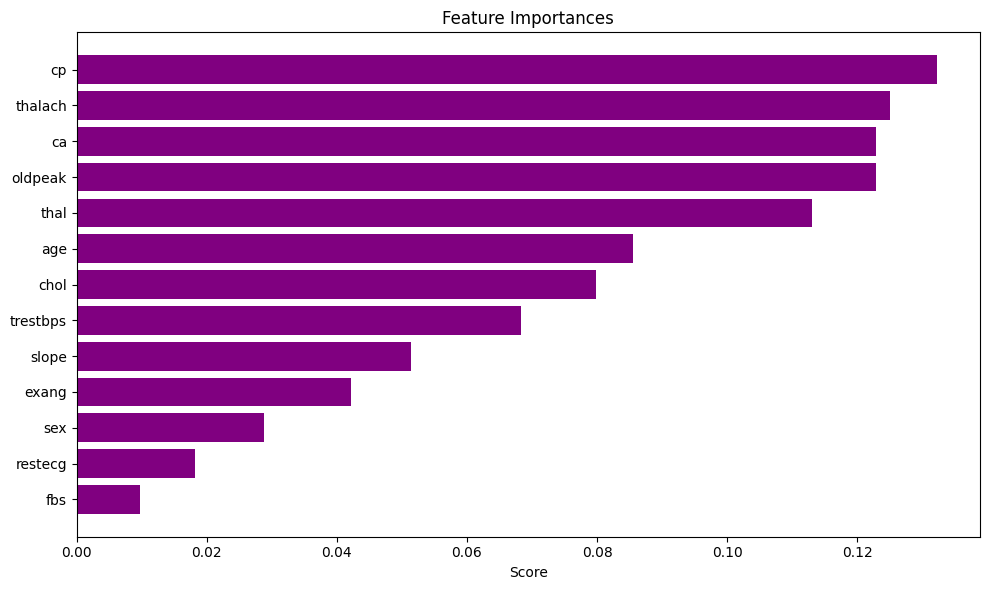

In [5]:
# 4.) Interpret feature importances.

importance = model_rf.feature_importances_

feature_df=pd.DataFrame({
    'Features' : x.columns,
    'Importance': importance
})

feature_df=feature_df.sort_values(by='Importance',ascending=False)

plt.figure(figsize=(10,6))
plt.barh(feature_df['Features'],feature_df['Importance'],color='purple')
plt.gca().invert_yaxis()
plt.title('Feature Importances')
plt.xlabel('Score')
plt.tight_layout()
plt.show()

In [6]:
# 5.) Evaluate using cross-validation.

cv_scores=cross_val_score(model_rf,x,y,cv=5)      # <------ 5 folds
print('Cross Validation Scores : ', cv_scores)
print('Average Cross Validation Score : ',cv_scores.mean())

Cross Validation Scores :  [1.         1.         1.         1.         0.98536585]
Average Cross Validation Score :  0.9970731707317073


**1. How does a decision tree work?**

Ans :

A decision tree splits data step by step using questions based on features.
At each step (called a node), it picks the best feature to split the data so the groups become more "pure" (mostly one class). It keeps doing this until it reaches a final decision like Yes or No.

**2. What is entropy and information gain?**

Ans :

Entropy measures how mixed or messy the data is (like uncertainty).

Information Gain tells us how much "cleaner" or more certain the data becomes after a split.
The tree picks the feature that gives the most information gain — meaning the split that reduces confusion the most.

**3. How is random forest better than a single tree?**

Ans :

A single tree can easily overfit — it might memorize the training data.
But a Random Forest builds many trees on random parts of the data and averages their results. This makes it more accurate, stable, and less likely to overfit.

**4. What is overfitting and how do you prevent it?**

Ans :

Overfitting is when the model performs great on training data but badly on new data — because it has memorized too much.
We prevent it by:

Limiting tree depth

Using Random Forests

Using cross-validation

Removing unnecessary features

**5. What is bagging?**

Ans :

Bagging (Bootstrap Aggregating) is a technique where we:

Make multiple random samples from the data (with replacement)

Train a model on each sample

Combine all predictions (like voting or averaging)

Random Forest uses bagging to build multiple decision trees and reduce variance.

**6. How do you visualize a decision tree?**

Ans :

We use the plot_tree() function from sklearn. It draws the tree step by step — showing which feature is split, the condition (like age <= 45), and how the data gets divided.
We can also use feature_names and class_names to make it easy to read.

**7. How do you interpret feature importance?**

Ans :

After training, models like Random Forest give a score for each feature.
The higher the score, the more that feature helped in making decisions.
We usually plot these as a bar chart to quickly see which features were most important for prediction.

**8. What are the pros/cons of Random Forests?**

Ans :

Pros:

Very accurate and powerful

Handles large datasets well

Resistant to overfitting

Can measure feature importance

Cons:

Slower to train than a single tree

Harder to interpret

Uses more memory